#Airline Passenger data 

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [47]:
df = pd.read_csv('/content/international-airline-passengers.csv')

In [48]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [49]:
df.rename(columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60':'Passenger Travel'},inplace = True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             145 non-null    object 
 1   Passenger Travel  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [51]:
df.isnull().sum()

Month               0
Passenger Travel    1
dtype: int64

In [52]:
df.dropna(axis = 0,inplace=True)

In [53]:
df.isnull().sum()

Month               0
Passenger Travel    0
dtype: int64

In [54]:
df.tail()

,Month,Passenger Travel
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [55]:
df.shape

(144, 2)

In [56]:
df['Month']=pd.to_datetime(df['Month'])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Month             144 non-null    datetime64[ns]
 1   Passenger Travel  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [58]:
df.set_index('Month',inplace = True)

In [59]:
df.head()

,Passenger Travel
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


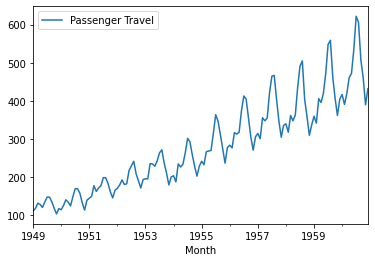

In [60]:
df.plot()

In [61]:
from statsmodels.tsa.stattools import adfuller

In [62]:
def adfuller_test(series):
  result = adfuller(series)
  print('Adf statistics {}'.format(result[0]))
  print('P-value {}'.format(result[1]))
  if result[1]<=0.05:
      print("Reject Null hypothies ,Because we have strong evidence")
  else:
      print("Do not reject null hyothies")

In [63]:
adfuller_test(df['Passenger Travel'])

Adf statistics 0.8153688792060472
P-value 0.991880243437641
Do not reject null hyothies


In [64]:
df['First Difference of Passenger data'] = df['Passenger Travel']-df['Passenger Travel'].shift(1)

In [65]:
df.head()

,Passenger Travel,First Difference of Passenger data
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [66]:
adfuller_test(df['First Difference of Passenger data'].dropna())

Adf statistics -2.8292668241700056
P-value 0.054213290283824704
Do not reject null hyothies


In [67]:
df['Second Difference of Passenger data'] = df['First Difference of Passenger data']-df['First Difference of Passenger data'].shift(1)

In [68]:
adfuller_test(df['Second Difference of Passenger data'].dropna())

Adf statistics -16.384231542468495
P-value 2.7328918500143186e-29
Reject Null hypothies ,Because we have strong evidence


In [69]:
df['12 Difference of Passenger data'] = df['Passenger Travel']-df['Passenger Travel'].shift(12)

In [70]:
adfuller_test(df['12 Difference of Passenger data'].dropna())

Adf statistics -3.383020726492481
P-value 0.011551493085514952
Reject Null hypothies ,Because we have strong evidence


In [71]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

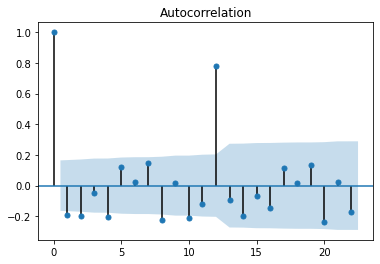

In [72]:
acf = plot_acf(df['Second Difference of Passenger data'].dropna())

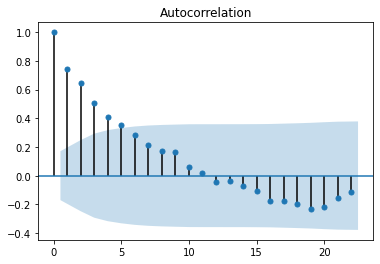

In [73]:
acf12 = plot_acf(df['12 Difference of Passenger data'].dropna())

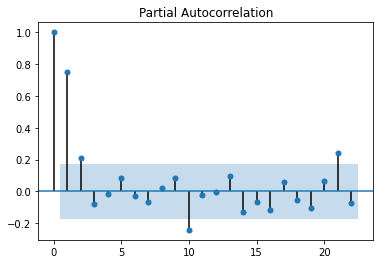

In [74]:
pacf12 = plot_pacf(df['12 Difference of Passenger data'].dropna())

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


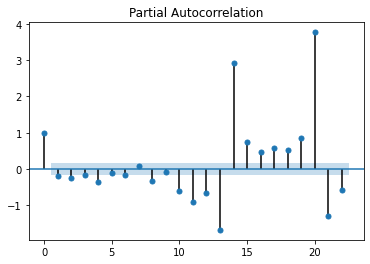

In [75]:
pacf = plot_pacf(df['Second Difference of Passenger data'].dropna())

In [76]:
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [77]:
train_data = df[:train_dataset_end]
test_data = df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [78]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [79]:
test_data

,Passenger Travel,First Difference of Passenger data,Second Difference of Passenger data,12 Difference of Passenger data
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [80]:
from statsmodels.tsa.arima_model import ARIMA

In [81]:
train_data

,Passenger Travel,First Difference of Passenger data,Second Difference of Passenger data,12 Difference of Passenger data
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [82]:
model_Arima = ARIMA(train_data['Passenger Travel'],order = (10,2,0))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [83]:
model_Arima_fit = model_Arima.fit()

In [84]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                              
===============================================================================
Dep. Variable:     D2.Passenger Travel   No. Observations:                   82
Model:                 ARIMA(10, 2, 0)   Log Likelihood                -357.239
Method:                        css-mle   S.D. of innovations             18.333
Date:                 Sun, 06 Mar 2022   AIC                            738.477
Time:                         12:53:14   BIC                            767.358
Sample:                     03-01-1949   HQIC                           750.072
                          - 12-01-1955                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0164      0.347      0.047      0.963      -0.665       0.697
ar.L1.D2.Passenger Travel     -0.5165      0.097     -5.300      0.000      -0.707      -0.325
ar.L2.D2.Passenger Travel     -0.7203      0.108     -6.650      0.000      -0.933      -0.508
ar.L3.D2.Passenger Travel     -0.4856      0.120     -4.032      0.000      -0.722      -0.250
ar.L4.D2.Passenger Travel     -0.7506      0.131     -5.717      0.000      -1.008      -0.493
ar.L5.D2.Passenger Travel     -0.5065      0.151     -3.360      0.001      -0.802      -0.211
ar.L6.D2.Passenger Travel     -0.5204      0.149     -3.500      0.001      -0.812      -0.229
ar.L7.D2.Passenger Travel     -0.3055      0.136     -2.250      0.028      -0.572      -0.039
ar.L8.D2.Passenger Travel     -0.5943      0.125     -4.744      0.000      -0.840      -0.349
ar.L9.D2.Passenger Travel     -0.2966      0.116     -2.556      0.013      -0.524      -0.069
ar.L10.D2.Passenger Travel    -0.4826      0.101     -4.765      0.000      -0.681      -0.284
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9098           -0.5670j            1.0720           -0.0887
AR.2             0.9098           +0.5670j            1.0720            0.0887
AR.3             0.4844           -0.9210j            1.0406           -0.1729
AR.4             0.4844           +0.9210j            1.0406            0.1729
AR.5            -0.9676           -0.4146j            1.0527           -0.4356
AR.6            -0.9676           +0.4146j            1.0527            0.4356
AR.7            -0.6004           -0.8889j            1.0726           -0.3445
AR.8            -0.6004           +0.8889j            1.0726            0.3445
AR.9            -0.1335           -1.1349j            1.1427           -0.2686
AR.10           -0.1335           +1.1349j            1.1427            0.2686
------------------------------------------------------------------------------
"""

In [85]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [86]:
prediction = model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals = test_data['Passenger Travel']-prediction

In [87]:
residuals

Month
1956-01-01    302.695967
1956-02-01    289.830798
1956-03-01    319.329689
1956-04-01    328.562167
1956-05-01    298.689299
1956-06-01    354.352092
1956-07-01    426.271448
1956-08-01    441.529637
1956-09-01    350.001331
1956-10-01    315.913211
1956-11-01    242.711490
1956-12-01    281.647799
1957-01-01    333.119982
1957-02-01    304.741472
1957-03-01    367.652396
1957-04-01    343.198134
1957-05-01    343.325743
1957-06-01    413.019343
1957-07-01    483.932094
1957-08-01    477.557323
1957-09-01    403.265261
1957-10-01    346.226367
1957-11-01    281.802339
1957-12-01    337.112089
1958-01-01    347.244804
1958-02-01    325.413868
1958-03-01    364.318085
1958-04-01    341.830094
1958-05-01    355.290668
1958-06-01    435.056472
1958-07-01    504.184605
1958-08-01    505.771336
1958-09-01    405.976038
1958-10-01    350.193216
1958-11-01    301.548556
1958-12-01    341.117865
1959-01-01    364.677804
1959-02-01    347.031477
1959-03-01    403.339716
1959-04-01    392.1

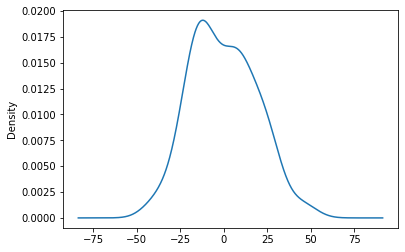

In [88]:
model_Arima_fit.resid.plot(kind = 'kde')

In [89]:
test_data['Prediction_Arima_new'] = prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


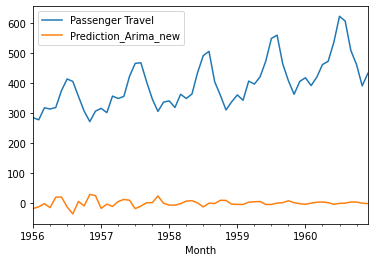

In [90]:
test_data[['Passenger Travel','Prediction_Arima_new']].plot()

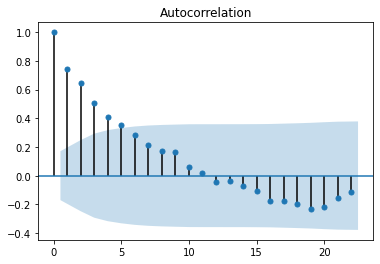

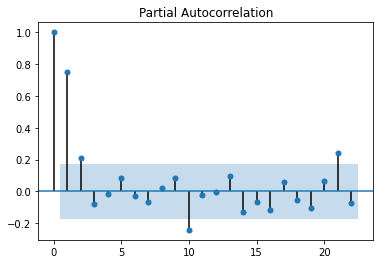

In [93]:
acf12 = plot_acf(df["12 Difference of Passenger data"].dropna())
pacf12 = plot_pacf(df["12 Difference of Passenger data"].dropna())

# Sarimax Model

In [100]:
model_SARIMA=SARIMAX(train_data['Passenger Travel'],order=(3,0,5),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [101]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [102]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                   Passenger Travel   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, 0, 12)   Log Likelihood                -265.240
Date:                            Sun, 06 Mar 2022   AIC                            548.481
Time:                                    12:56:55   BIC                            568.971
Sample:                                01-01-1949   HQIC                           556.638
                                     - 12-01-1955                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5977      0.938      0.638      0.524      -1.240       2.435
ar.L2          0.8311      0.232      3.583      0.000       0.376       1.286
ar.L3         -0.4519      0.894     -0.506      0.613      -2.203       1.300
ma.L1          0.1844      1.164      0.158      0.874      -2.098       2.466
ma.L2         -0.5336      1.262     -0.423      0.672      -3.007       1.940
ma.L3         -0.0987      0.384     -0.257      0.797      -0.852       0.654
ma.L4         -0.1274      0.338     -0.377      0.706      -0.789       0.534
ma.L5          0.2470      0.357      0.692      0.489      -0.452       0.946
sigma2        87.7355     81.196      1.081      0.280     -71.406     246.877
===================================================================================
Ljung-Box (Q):                       27.22   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.94   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [ ]:
test_data

In [108]:
pred_Sarima=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Passenger Travel']-pred_Sarima

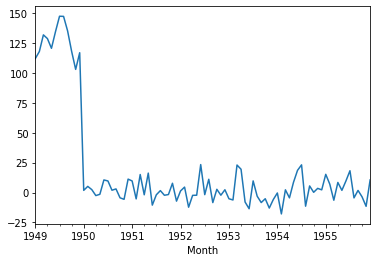

In [109]:
model_SARIMA_fit.resid.plot()

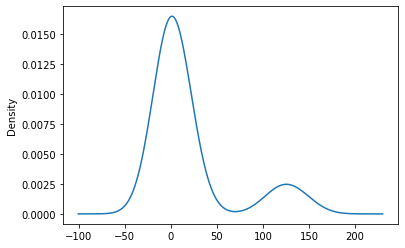

In [110]:
model_SARIMA_fit.resid.plot(kind='kde')

In [111]:
test_data['Predicted_SARIMA']=pred_Sarima

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


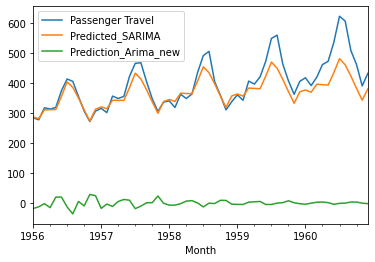

In [113]:
test_data[['Passenger Travel','Predicted_SARIMA','Prediction_Arima_new']].plot()